<a href="https://colab.research.google.com/github/somuhemu/Mini-Project/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install ipython-autotime
%load_ext autotime

time: 209 µs (started: 2021-05-24 07:27:58 +00:00)


In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [61]:
#data gathering part
from bing_image_downloader import downloader
downloader.download("cricket ball",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from https://www.bwallpaperhd.com/wp-content/uploads/2018/07/CricketWicket.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://im.rediff.com/cricket/2017/aug/16malinga.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.cakeology.net/media/catalog/product/3/d/3dCricketBallCake_1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://im.rediff.com/cricket/2020/dec/08virat.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://cdnassets.hw.net/be/92/b59800304378a39c5602c69ccb82/5f99505e68ea475c98541a7776ea0253.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://atlanticcapitalbank.com/wp-content/uploads/2018/03/Thomas-Lizanne.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://thumbs.dreamstime.com/z/cricket-sport-15507284.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://atlanticcapitalbank.com/wp-content/uploads/202

In [63]:
#Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

Datadir = '/content/images'
Categories = ['car','cricket ball','trains']

for category in Categories:
  class_num = Categories.index(category)
  path = os.path.join(Datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
    

time: 1min 30s (started: 2021-05-24 09:22:09 +00:00)


In [64]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 9.41 ms (started: 2021-05-24 09:23:48 +00:00)


In [65]:
flat_data[0]

array([0.19215686, 0.19607843, 0.26666667, ..., 0.27805229, 0.25022222,
       0.21884967])

time: 3.26 ms (started: 2021-05-24 09:23:51 +00:00)


<BarContainer object of 3 artists>

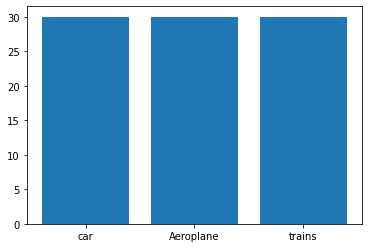

time: 165 ms (started: 2021-05-24 09:05:39 +00:00)


In [44]:
unique,count = np.unique(target,return_counts = True)
plt.bar(Categories,count)

In [66]:
#now split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state = 109)

time: 20.7 ms (started: 2021-05-24 09:24:05 +00:00)


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 7s (started: 2021-05-24 09:24:07 +00:00)


In [68]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 123 ms (started: 2021-05-24 09:25:22 +00:00)


In [69]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 8.77 ms (started: 2021-05-24 09:25:24 +00:00)


In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.64 ms (started: 2021-05-24 09:25:26 +00:00)


In [71]:
accuracy_score(y_pred,y_test)

1.0

time: 8.66 ms (started: 2021-05-24 09:25:28 +00:00)


In [72]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  8]])

time: 6.84 ms (started: 2021-05-24 09:25:34 +00:00)


In [73]:
#saving the model using pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 46.3 ms (started: 2021-05-24 09:25:40 +00:00)


In [74]:
model = pickle.load(open('img_model.p','rb'))

time: 26.8 ms (started: 2021-05-24 09:25:43 +00:00)


Enter your urlhttps://etimg.etb2bimg.com/photo/75058974.cms
(796, 1920, 4)
Predicted output: car


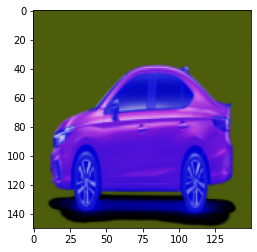

time: 4.9 s (started: 2021-05-24 09:33:34 +00:00)


In [82]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'Predicted output: {y_out}')